In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

def select_b_g_r(image):
    # blue color mask
    lower = np.uint8([  0, 0, 0])
    upper = np.uint8([255, 80, 80])
    blue_mask = cv2.inRange(image, lower, upper)
    
    # green color mask
    lower = np.uint8([  0, 0, 0])
    upper = np.uint8([100, 255, 100])
    green_mask = cv2.inRange(image, lower, upper)
    
    # red color mask
    lower = np.uint8([  0, 0, 0])
    upper = np.uint8([50, 50, 255])
    red_mask = cv2.inRange(image, lower, upper)
    
    hsv = convert_hsv(image)
    # yellow color mask HSV
    lower = np.uint8([ 80, 150, 20])
    upper = np.uint8([ 120, 255, 255])
    #lower = np.uint8([ 30, 20, 0])
    #upper = np.uint8([ 80, 100, 100])
    yellow_mask = cv2.inRange(hsv, lower, upper)
    
    # combine the mask
    mask_bg = cv2.bitwise_or(blue_mask, green_mask)
    #mask_ry = cv2.bitwise_or(red_mask, yellow_mask)
    mask_ry = cv2.bitwise_or(red_mask, yellow_mask)
    mask = cv2.bitwise_or(mask_bg,mask_ry)
    #mask = yellow_mask
    return cv2.bitwise_and(image, image, mask = mask)

def convert_hls(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2HLS)

def convert_hsv(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

In [ ]:

 
# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
#vedioname = input("vedio name: ")
vedioname = 'r5.jpg'
frame = cv2.imread(vedioname)
    
frame = cv2.resize(frame, (640, 480))
#gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

r,c,n = frame.shape
midx = int(c/2)
midy = int(r/2)
offsetx = 80
offsety = 100
        #frame = frame[midx-offsetx:midx+offsetx, midy-offsety:midy+offsety]
        
    
        #equlizer in rgb
img_yuv = cv2.cvtColor(frame, cv2.COLOR_BGR2YUV)
        # equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
        # convert the YUV image back to RGB format
img = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
        
        #converting grayscale and resize
img = select_b_g_r(img)
#cv2.imshow('Frame',img)         
        #img = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)
        

        #dilation process
kernel = np.ones((3,3),np.uint8)


gray = cv2.erode(img,kernel,iterations = 2)
gray = cv2.dilate(gray,kernel,iterations = 1)
gray = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
gray = cv2.cvtColor(gray,cv2.COLOR_BGR2GRAY)
#cv2.imshow('Frame',img)  
#canny edge detection

 # Initiate STAR detector
#orb = cv2.ORB()

# find the keypoints with ORB
#kp = orb.detect(gray,None)

# compute the descriptors with ORB
#kp, gray = orb.compute(gray, kp)


#cv2.drawContours(gray, area, 3, (0,255,0), 3)
#gray_filtered = cv2.inRange(gray, 200,255)
# Threshold it so it becomes binary
ret, gray = cv2.threshold(gray,30,255,cv2.THRESH_BINARY)

gray = cv2.Canny(gray,80,150,apertureSize = 3)
#ret,thresh = cv2.threshold(gray, 127, 255, 0)
im2, contours, hierarchy = cv2.findContours(gray,1,2)


n = 0
la = 0
maxarea = 0
area = []
for cnt in contours:

    #if cv2.isContourConvex(contours[i]) == True:
        #if cv2.contourArea(contours[i])>80:
    [x,y,w,h] = cv2.boundingRect(cnt)  
    a = w*h
    if a > 100:
        cv2.drawContours(frame, cnt, -1, (0,0,0), 5)
        area.append(a)
    #cv2.rectangle(gray,(x,y),(x+w,y+h),(255,0,255),2)

        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),2)
        cv2.imshow('Frame',frame)  
cv2.waitKey(50000) & 0xFF == ord('q')
    

    #break

cv2.destroyAllWindows()
     
         


(159, 318, 3)
(50562, 3)
(50562, 1)
(50562, 1)
(50562, 5)
Fitting model on a small sub-sample of the data
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 18.140270665038905
start iteration
done sorting
end inner loop
Iteration 1, inertia 17.83165654821341
start iteration
done sorting
end inner loop
Iteration 2, inertia 17.53251623901052
start iteration
done sorting
end inner loop
Iteration 3, inertia 17.181815289099156
start iteration
done sorting
end inner loop
Iteration 4, inertia 16.998901913247533
start iteration
done sorting
end inner loop
Iteration 5, inertia 16.937906541390298
start iteration
done sorting
end inner loop
Iteration 6, inertia 16.926151697304984
start iteration
done sorting
end inner loop
Iteration 7, inertia 16.92189252236517
start iteration
done sorting
end inner loop
Iteration 8, inertia 16.918544342418706
start iteration
done sorting
end inner loop
Iteration 9, inertia 16.91579549592047
start iteration
done sorting
end i

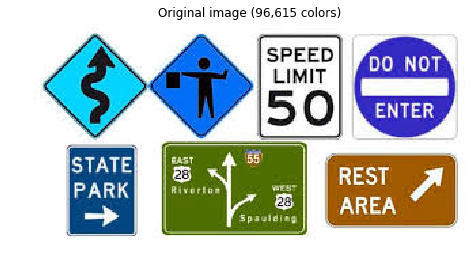

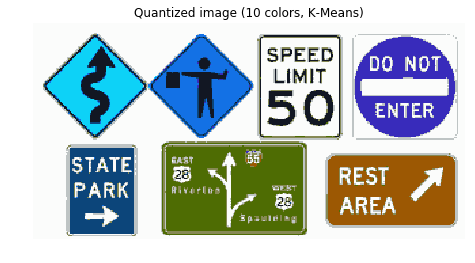